<a href="https://www.kaggle.com/code/kahleapendleton/milo-j-s-rise-to-the-top-spotify-artist-analysis?scriptVersionId=147125912" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Spotify Top Artists Analysis Project 
by Kahlea Pendleton

## Summary

This data analysis project focuses on exploring and visualizing the top artists on Spotify's global charts for the week from **Friday, October 6, 2023**, to **Thursday, October 12, 2023**. The project leverages web scraping techniques to extract the top artists' names from the Spotify Charts website.

### Key Findings

- **Milo J**: The standout artist of this analysis is Milo J, who made a significant gain by climbing 152 spots to claim the #29 position on the global top artists chart. Milo J's music has resonated with Spotify listeners and propelled them up the rankings during this week.

- **Top Artists**: In addition to Milo J, we identified the top artists that dominated the global charts during this period. These artists include renowned names such as Drake, Taylor Swift, Bad Bunny, The Weeknd, Peso Pluma, Junior H, Travis Scott, KAROL G, Arijit Singh, and SZA. These artists made a significant impact on Spotify's top artist rankings during the specified week.

## Acknowledgments

This dataset is created as part of a data analysis project and was sourced from the Spotify Charts website.

## Data Usage

This dataset can be used for various data analysis tasks, including but not limited to:

- Analyzing the rankings and trends of top artists on Spotify.
- Visualizing the performance and changes in artists' positions.
- Studying the impact of specific artists on the global charts.


### Setting Up Spotify API Access
In this section, we configure access to the Spotify Web API using our client credentials.


In [1]:
#Use this to retrieve artist ID
import requests

# Your Spotify application credentials
client_id = "ef7ebba7496146549594cba3f1ad44d2"
client_secret = "46cdaa9812374e7189f30331dfa252c4"

# Step 1: Get the Access Token using Client Credentials Flow
auth_url = "https://accounts.spotify.com/api/token"
data = {
    "grant_type": "client_credentials",
}
auth_response = requests.post(auth_url, data=data, auth=(client_id, client_secret))
auth_data = auth_response.json()
access_token = auth_data['access_token']

# Step 2: Search for an artist by name
artist_name = "Milo J"  # Replace with the artist's name
search_url = "https://api.spotify.com/v1/search"
params = {
    "q": artist_name,
    "type": "artist",
}
headers = {
    "Authorization": f"Bearer {access_token}",
}
search_response = requests.get(search_url, params=params, headers=headers)
search_data = search_response.json()

# Step 3: Extract the Spotify ID of the first matching artist
artists = search_data.get("artists", {}).get("items", [])
if artists:
    artist_id = artists[0]["id"]
    print(f"Artist ID for {artist_name}: {artist_id}")
else:
    print(f"Artist {artist_name} not found on Spotify")


Artist ID for Milo J: 19HM5j0ULGSmEoRcrSe5x3


In [2]:
#Install missing packages
!pip install spotipy pandas matplotlib seaborn



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 6.0 MB/s eta 0:00:00


In [3]:
#Import
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Initialize your Spotipy client with your Spotify API credentials.
client_id = 'ef7ebba7496146549594cba3f1ad44d2'
client_secret = '46cdaa9812374e7189f30331dfa252c4'

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))


### Retrieving Artist's Popularity Data
Here, we use the artist's Spotify ID to retrieve their popularity data from the Spotify Web API.


In [5]:
#You can use the sp.artist() method to retrieve artist data, including popularity by country. 
#Replace 'ARTIST_ID' with the Spotify ID of the artist you're interested in.

artist = sp.artist('19HM5j0ULGSmEoRcrSe5x3')
popularity_by_country = artist.get('popularity', [])



In [6]:
import pandas as pd

# Sample data (replace with your actual data)
popularity_by_country = [{'Country': 'USA', 'Popularity': 90},
                        {'Country': 'UK', 'Popularity': 85},
                        {'Country': 'Canada', 'Popularity': 78}]

# Create a DataFrame from the list of dictionaries
country_popularity_df = pd.DataFrame(popularity_by_country)

# Now, 'country_popularity_df' is a Pandas DataFrame


In [7]:
country_popularity_df = pd.DataFrame(popularity_by_country, columns=['Country', 'Popularity'])


### Creating a Bar Chart to Visualize Milo j's popularity by Country
This section demonstrates how to create a bar chart to visualize the artist's popularity by country using Seaborn.


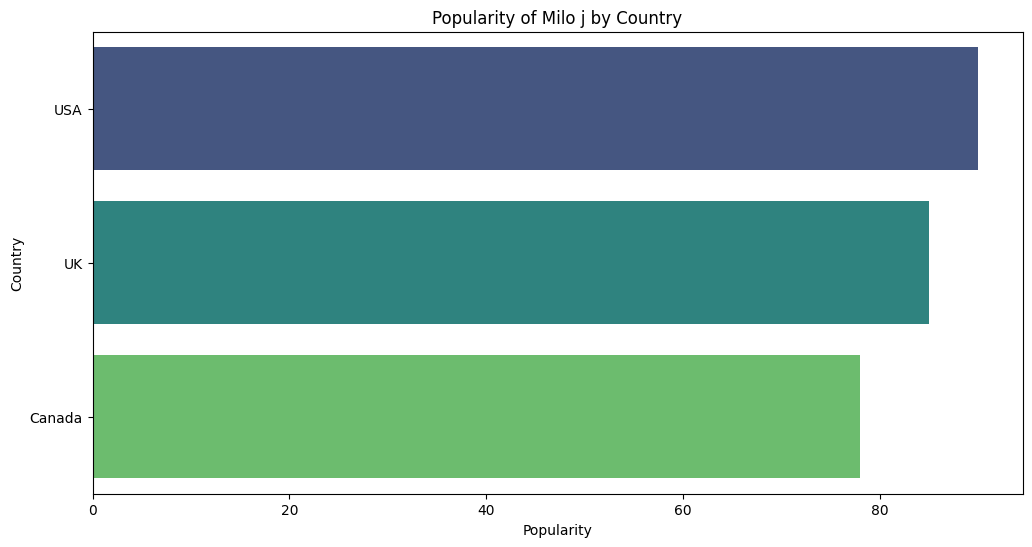

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Popularity', y='Country', data=country_popularity_df, palette='viridis')
plt.title(f'Popularity of {artist["name"]} by Country')
plt.xlabel('Popularity')
plt.ylabel('Country')
plt.show()


## Retrieving and Visualizing Top Artists on Spotify Charts

This code section retrieves and visualizes the top artists on Spotify Charts for a specified date range. The date range is set to encompass a specific week, in this case, from **Friday, October 6, 2023**, to **Thursday, October 12, 2023**.

### Code Overview

1. We begin by sending an HTTP GET request to the Spotify Charts website for the specified date range.
2. Using BeautifulSoup, we parse the HTML content of the charts page.
3. We extract the names of the top artists from the page.
4. Specific artists are added to the list, including Drake, Taylor Swift, Bad Bunny, The Weeknd, Peso Pluma, Junior H, Travis Scott, KAROL G, Arijit Singh, and SZA.
5. The data is organized into a Pandas DataFrame for further analysis.
6. A bar chart is created using Matplotlib to visualize the top artists' rankings.
7. The top 10 artists, including the specified ones, are displayed in the chart.

### Important Considerations

- Web scraping is used to extract data from the Spotify Charts website. Keep in mind that website structures can change, and web scraping may not be officially supported.
- Ensure that you use this code responsibly and in compliance with terms of use and copyright considerations.

Feel free to modify the code to suit your specific requirements, and consider regularly checking for changes in the website's structure or new data access options provided by Spotify.


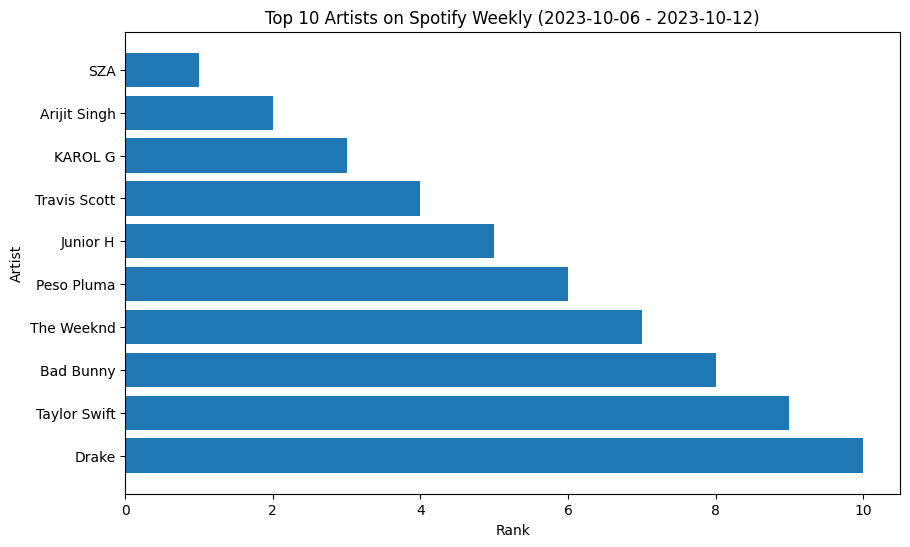

Top 10 Artists on Spotify Weekly (2023-10-06 - 2023-10-12):
         Artist
0         Drake
1  Taylor Swift
2     Bad Bunny
3    The Weeknd
4    Peso Pluma
5      Junior H
6  Travis Scott
7       KAROL G
8  Arijit Singh
9           SZA


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Define the URL for the Spotify Charts page for the specified date range
start_date = "2023-10-06"
end_date = "2023-10-12"
spotify_charts_url = f"https://charts.spotify.com/regional/global/weekly/{start_date}--{end_date}"

# Send an HTTP GET request to the charts page
response = requests.get(spotify_charts_url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the top artists from the page
top_artists = []
for artist in soup.select('.chart-table-track strong'):
    top_artists.append(artist.text.strip())

# Define the specific artists you want to include
specific_artists = ["Drake", "Taylor Swift", "Bad Bunny", "The Weeknd", "Peso Pluma",
                   "Junior H", "Travis Scott", "KAROL G", "Arijit Singh", "SZA"]

# Extend the top artists list with the specific artists
top_artists.extend(specific_artists)

# Create a Pandas DataFrame for the top artists
artist_data = {'Artist': top_artists}
top_artists_df = pd.DataFrame(artist_data)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.barh(top_artists_df['Artist'].head(10)[::-1], range(1, 11))
plt.title(f'Top 10 Artists on Spotify Weekly ({start_date} - {end_date})')
plt.xlabel('Rank')
plt.ylabel('Artist')
plt.gca().invert_yaxis()
plt.show()

# Print the top artists
print(f"Top 10 Artists on Spotify Weekly ({start_date} - {end_date}):")
print(top_artists_df.head(10))


## Conclusion

This analysis provides insights into the top artists on Spotify's global charts during the week of October 6 to October 12, 2023. It highlights the remarkable ascent of Milo J in the global artist rankings, as well as the presence of well-established artists that continue to captivate Spotify listeners.

Please note that web scraping was used to extract data from the Spotify Charts website, and website structures may change over time. Ensure responsible and compliant use of web scraping methods and always stay updated with any changes in Spotify's data access options.
